In [2]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

root_dir = Path.cwd().parents[1]
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))

In [3]:
from placefield_detection.process_session import process_session

In [4]:
pathSession = Path("../../../../data/845ad/Session10")

pathBehavior = pathSession / "aligned_behavior.pkl"
pathActivity = [
    file
    for file in pathSession.iterdir()
    if (
        file.stem.startswith("results_CaImAn")
        and not "compare" in file.stem
        and "redetected" in file.stem
    )
][0]

In [5]:
from placefield_detection.utils import prepare_behavior_from_file
from caiman.utils.utils import load_dict_from_hdf5

nbin = 40
behavior = prepare_behavior_from_file(
    pathBehavior,
    nbin=nbin,
    f=15.0,
    only_active=True,
    calculate_performance=True,
    # plt_trials=True,
    plt_bool=True,
)

ld = load_dict_from_hdf5(pathActivity)
neuron_activity = ld["S"][:]

2025-07-09 15:17:55.037265: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 15:17:55.059443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from matplotlib import pyplot as plt
from placefield_detection.utils import prepare_activity, plot_activity
from ipywidgets import widgets, HBox, VBox, Output
import numpy as np

output = Output()
neuron_idx = 20  # initial neuron index


def update_plot(change=None):
    output.clear_output(wait=True)
    prepared = prepare_activity(neuron_activity[neuron_idx, :], behavior)
    with output:
        print(f"neuron={neuron_idx}")
        plot_activity(prepared, behavior)


def forward(b):
    global neuron_idx
    if neuron_idx < np.inf:
        neuron_idx += 1
        update_plot()


def backward(b):
    global neuron_idx
    if neuron_idx > 0:
        neuron_idx -= 1
        update_plot()


btn_forward = widgets.Button(description="Forward")
btn_backward = widgets.Button(description="Backward")
btn_forward.on_click(forward)
btn_backward.on_click(backward)

display(HBox([btn_backward, btn_forward]))
display(output)
update_plot()

# for neuron in range(20,30):
# 	prepared_activity = prepare_activity(neuron_activity[neuron,:], behavior)
# 	print(f"{neuron=}")
# 	plot_activity(prepared_activity, behavior)

Output()

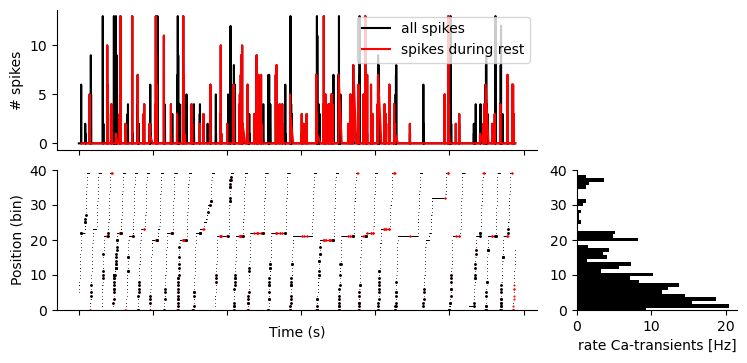

In [17]:
from placefield_detection.process_single_neuron import process_single_neuron
from placefield_detection.utils import plot_activity

process_neuron = process_single_neuron(
    behavior,
    mode_place_cell_detection=["peak", "information"],
    mode_place_field_detection=["bayesian"],
)
neuron = 20
process_neuron.run_preprocessing(neuron_activity[neuron, :])
plot_activity(process_neuron.prepared_activity, behavior)

In [18]:
# neuron = 11
# plot_activity(process_neuron.prepared_activity, behavior)
process_neuron.run_detection(
    neuron_activity[neuron, :], limit_execution_time=600, show_status=True
)


f=0

Z=-2399.0(0.00%) | Like=-2363.34..-2348.19 [-2367.0938..-2362.4921] | it/evals=3271/162709 eff=1.9624% N=20  
f=1

Z=-1726.2(98.98%) | Like=-1674.91..-1674.41 [-1674.9064..-1674.9054]*| it/evals=11710/708493 eff=1.0361% N=209  72 72 
f=2

increasing step size to n_steps=20
Forever is over!) | Like=-1508.16..-1505.66 [-1508.2983..-1507.8430] | it/evals=7679/1098737 eff=0.6990% N=100 00 0  
Exception: Sampling took too long
Model comparison finished after 856.16s with evidences: 	 f=0 , logz=-2398.20	 f=1 *, logz=-1726.19


{'firingstats': {'firing_rate': 3.0003337412392925,
  'map_rates': array([ 9.32432432, 20.49295775, 15.50847458, 18.75      , 14.46428571,
         11.45454545, 12.29508197, 13.69565217,  8.30769231,  7.13114754,
         10.17241379,  3.28767123,  5.67567568,  7.25      ,  1.34328358,
          4.        ,  3.54545455,  4.28571429,  1.42857143,  0.        ,
          8.18181818,  4.78915663,  5.10638298,  0.14018692,  0.        ,
          0.52325581,  0.23076923,  0.22058824,  0.50847458,  0.        ,
          0.77922078,  1.21621622,  0.19480519,  0.        ,  0.        ,
          1.2295082 ,  1.55172414,  3.67924528,  1.19047619,  0.        ]),
  'map_trial_rates': array([[         nan,          nan,          nan,          nan,
                   nan,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.  

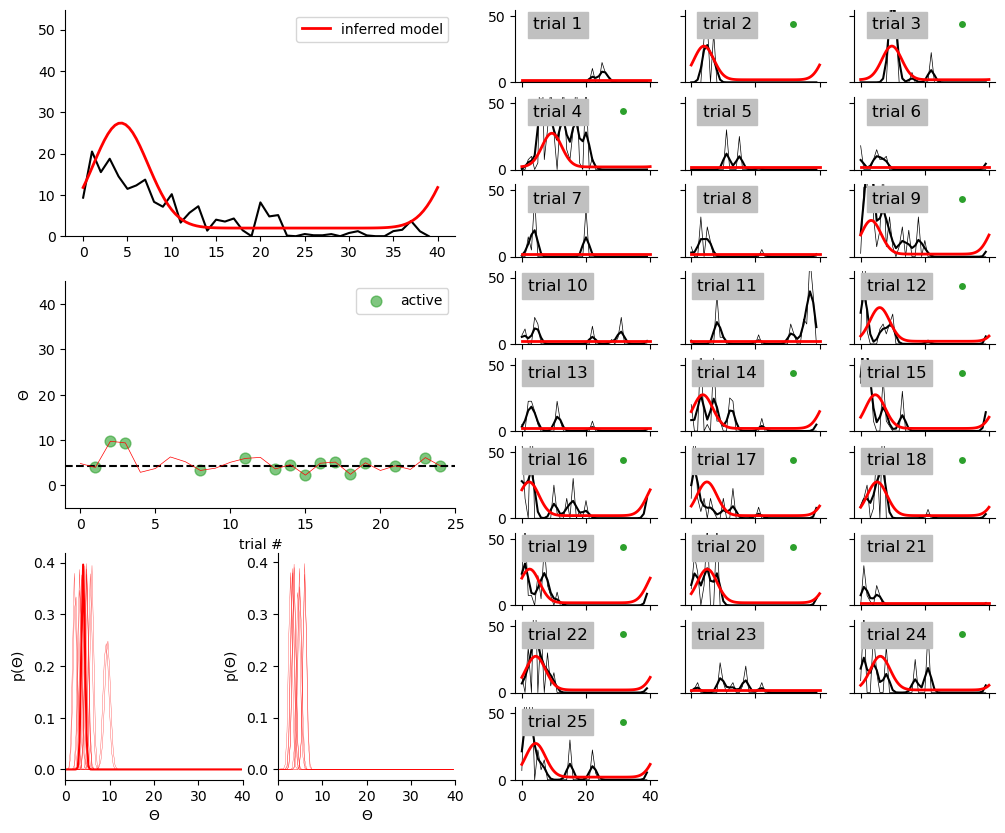

{'is_place_cell': True, 'fields': {'n_modes': 1, 'parameter': {'global': {'A0': array([1.96869895, 1.82262802, 2.11390724]), 'theta': array([[4.24300696, 4.1549178 , 4.37605413],
       [0.        , 0.        , 0.        ]]), 'A': array([[25.44542982, 24.09147501, 26.27462345],
       [ 0.        ,  0.        ,  0.        ]]), 'sigma': array([[3.0752416 , 3.0524949 , 3.10792981],
       [0.        , 0.        , 0.        ]])}, 'local': {'A0': None, 'theta': array([[[ 4.8068983 ,  4.72966008,  4.94429238],
        [ 3.95254718,  3.86368262,  4.08137362],
        [ 9.72823112,  8.9060728 , 10.56403359],
        [ 9.36413805,  8.64806806, 10.11645071],
        [ 2.86681709,  2.78665779,  3.00461683],
        [ 3.70886776,  3.61341353,  3.8432105 ],
        [ 6.26103488,  6.0608039 ,  6.46864557],
        [ 5.20158003,  5.12623355,  5.33634141],
        [ 3.2797902 ,  3.16771705,  3.42283972],
        [ 3.78251668,  3.69396255,  3.90908918],
        [ 5.08639314,  5.00251551,  5.2017974 ],

In [19]:
from placefield_detection.analyze_results import display_results

# process_neuron.results
# process_neuron.results["bayesian"] = process_neuron.place_cell_results.get(
#     "bayesian", {"status": {"is_place_cell": {}}}
# )
display_results(process_neuron.results)
print(process_neuron.results["bayesian"])

KeyError: 'bayesian'

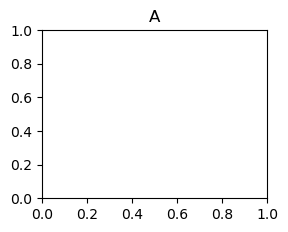

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure()
for i, key in enumerate(["A", "theta", "sigma"], start=1):

    ax = fig.add_subplot(2, 2, i)
    ax.set_title(key)
    ax.plot(
        process_neuron.place_cell_results["bayesian"]["fields"]["x"][key][:-1],
        process_neuron.place_cell_results["bayesian"]["fields"]["p_x"]["global"][key][
            0, :
        ],
    )

[0. 0. 0. ... 0. 0. 0.]


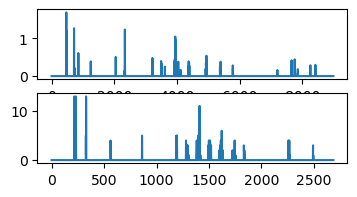

In [8]:
from placefield_detection.utils import prepare_activity
from placefield_detection.HierarchicalBayesInference import HierarchicalBayesInference
import logging

activity = neuron_activity[2, :]
processed_activity = prepare_activity(
    activity, behavior["active"], behavior["trials"], nbin
)
# print(activity)
# print(processed_activity["spike_map"])
hbm = HierarchicalBayesInference(
    processed_activity["spike_map"],
    behavior["trials"]["dwelltime"],
    logLevel=logging.ERROR,
)

# fig, axes = plt.subplots(2,1,figsize=(4,2))
# axes[0].plot(activity, "k", ms=0.5, label="raw activity")
# axes[1].plot(processed_activity['S'], "r", ms=0.5, label="raw activity")

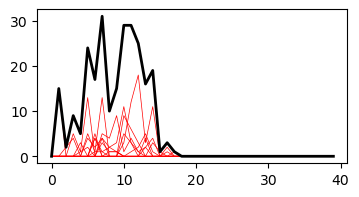

In [9]:
processed_activity["spike_map"].sum(axis=0)
plt.figure(figsize=(4, 2))
plt.plot(
    processed_activity["spike_map"].T, "r", ms=0.5, label="raw activity", linewidth=0.5
)
plt.plot(
    processed_activity["spike_map"].sum(axis=0),
    "k",
    ms=0.5,
    label="raw activity",
    linewidth=2,
)

In [10]:
import numpy as np

# hbm.set_priors(N_f=1, hierarchical_in=["theta"], wrap=["theta"])
hbm.set_priors(N_f=0, hierarchical_in=["theta"], wrap=["theta"])

from placefield_detection.analyze_results import build_inference_results

hbm.inference_results = build_inference_results(
    n_cells=1,
    N_f=2,
    nbin=40,
    mode="bayesian",
    n_trials=hbm.nSamples,
    hierarchical=hbm.hierarchical,
)

# my_prior_trafo = hbm.set_prior_transform(vectorized=True)
# my_likelihood = hbm.set_logp_func(vectorized=True, penalties=["overlap", "reliability"])

# p_test = np.random.rand(1, hbm.nParams)
# p_prior = my_prior_trafo(p_test)
# print("prior", p_prior)

# sampling_results = hbm.run_sampling(
#     penalties=["overlap", "reliability"],
#     improvement_loops=2,
#     show_status=True,
# )

In [11]:
from placefield_detection.analyze_results import build_results

hbm.inference_results = build_results(
    n_cells=1,
    nbin=40,
    n_trials=hbm.nSamples,
    modes=["bayesian"],
    N_f=2,
    hierarchical=hbm.hierarchical,
)

In [20]:
behavior["trials"]["dwelltime"].shape

(25, 40)

In [12]:
hbm.inference_results

{'status': {'SNR': array(nan), 'r_value': array(nan)},
 'firingstats': {'rate': array(nan),
  'map': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan]),
  'trial_map': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan],
         [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan

In [14]:
# hbm.store_inference_results(sampling_results)
# hbm.inference_results

hbm.set_priors(N_f=0, hierarchical_in=["theta"], wrap=["theta"])
sampling_results = hbm.run_sampling(
    penalties=["overlap", "reliability"],
    improvement_loops=2,
    show_status=True,
)

In [15]:
hbm.inference_results["fields"]["logz"][0, 0] = sampling_results["logz"]
hbm.inference_results["fields"]["logz"][0, 1] = sampling_results["logzerr"]
hbm.store_inference_results(sampling_results)
prev_logz = sampling_results["logz"]

KeyError: 'fields'

In [182]:
hbm.set_priors(N_f=1, hierarchical_in=["theta"], wrap=["theta"])
sampling_results = hbm.run_sampling(
    penalties=["overlap", "reliability"],
    improvement_loops=2,
    show_status=True,
)

In [183]:
hbm.inference_results["fields"]["logz"][1, 0] = sampling_results["logz"]
hbm.inference_results["fields"]["logz"][1, 1] = sampling_results["logzerr"]
hbm.store_inference_results(sampling_results)
prev_logz = sampling_results["logz"]

In [184]:
hbm.calculate_general_statistics()

In [186]:
hbm.inference_results

{'is_place_cell': True,
 'fields': {'n_modes': 1,
  'parameter': {'global': {'A0': array([0.00618947, 0.0003159 , 0.01785048]),
    'theta': array([[ 9.84656647,  8.96445076, 10.6813692 ],
           [ 0.        ,  0.        ,  0.        ]]),
    'A': array([[15.10994498, 13.32695393, 16.96174645],
           [ 0.        ,  0.        ,  0.        ]]),
    'sigma': array([[2.67959816, 2.4937974 , 2.88807619],
           [0.        , 0.        , 0.        ]])},
   'local': {'A0': None,
    'theta': array([[[11.28126395,  6.43080971, 15.95077858],
            [10.00116393,  7.51673512, 13.37875466],
            [ 3.98025373,  3.24708278,  4.72194089],
            [ 4.72058453,  3.82755306,  5.6239486 ],
            [11.82404507,  8.8538093 , 15.68992925],
            [10.59546052,  8.54043333, 13.89815553],
            [11.54175994,  9.03144105, 15.42553437],
            [12.01921035,  8.78684301, 16.18312182],
            [ 6.53081765,  4.91080038,  8.19670498],
            [ 6.00274316,

KeyError: 'firingstats'

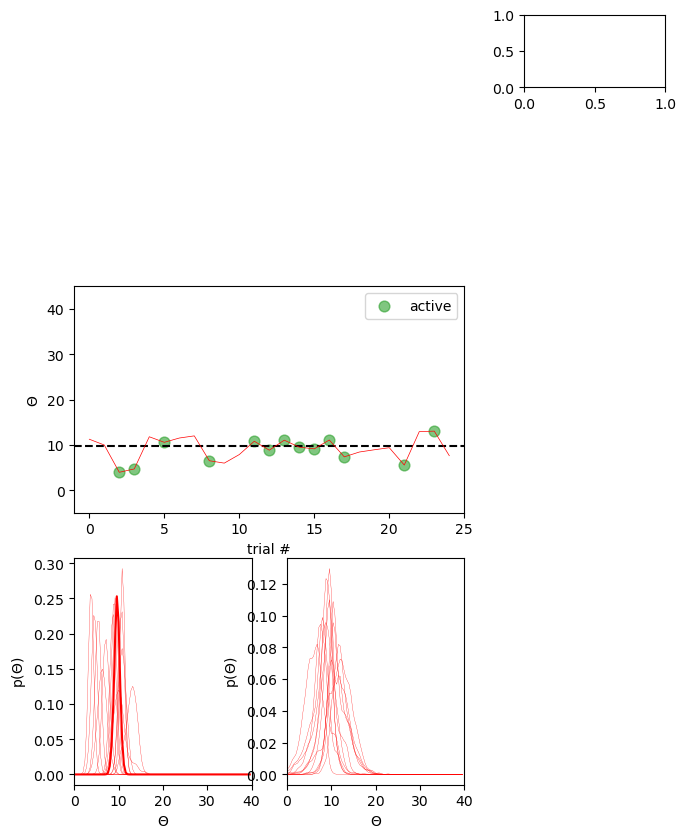

In [ ]:
from placefield_detection.analyze_results import display_results

display_results(hbm.inference_results)

In [ ]:
res_fields = hbm.model_comparison(
    hierarchical=["theta"], show_status=True, limit_execution_time=300
)

### before that, build_results and merely put in fields into substructure


f=0

Exception: could not broadcast input array from shape (2,) into shape (0,3)=1480/93424 eff=1.6605% N=200 


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

KeyError: 'firingstats'

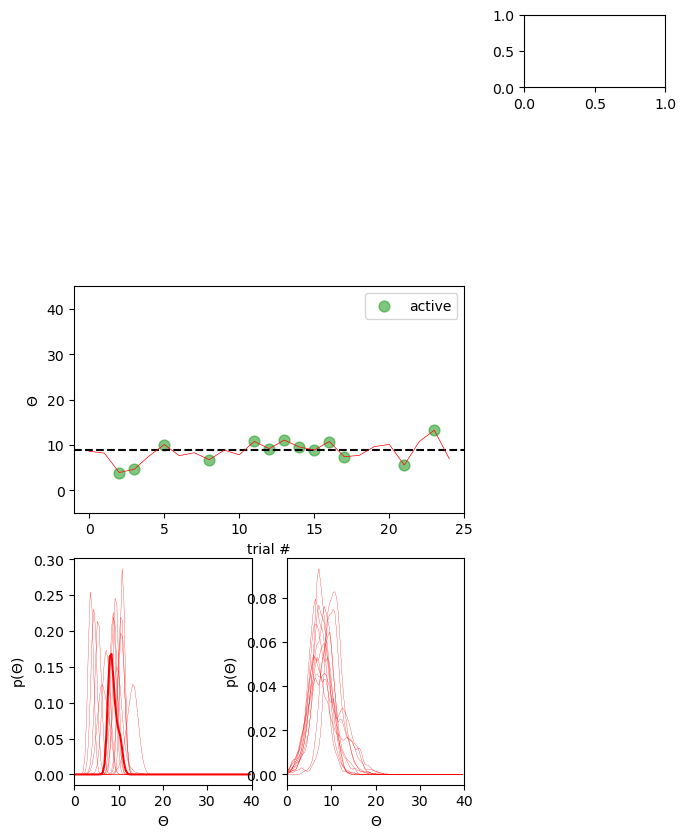

In [190]:
from placefield_detection.analyze_results import display_results

display_results(hbm.inference_results)

In [138]:
print("logp", my_likelihood(p_prior))

logp [-915.7210637]


In [ ]:
from placefield_detection.process_single_neuron import process_single_neuron
from dataclasses import dataclass


@dataclass
class parameter:
    nbin: int


param = parameter(40)

process_single_neuron = process_single_neuron(
    behavior,
    param,
    ["peak", "information"],
    ["bayesian"],
    plot_it=True,
)
# process_single_neuron.run_detection(neuron_activity[1, :])

[0. 0. 0. ... 0. 0. 0.]
increasing step size to n_steps=20
Forever is over!
Exception: Sampling took too long


KeyError: 'status'

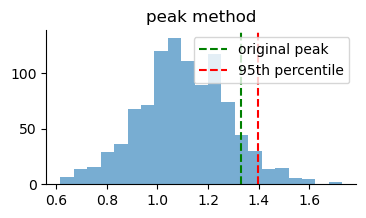

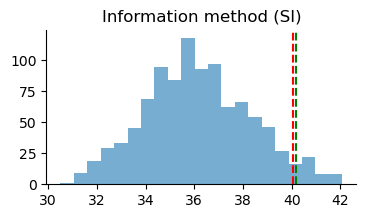

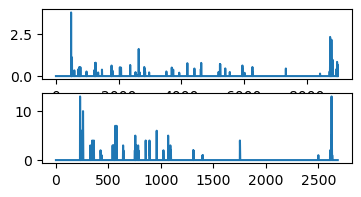

In [140]:
process_single_neuron.run_detection(neuron_activity[2, :])

In [46]:
process = process_session()
results = process.from_file(
    path_data=pathActivity,
    path_behavior=pathBehavior,
    # path_results=pathSession / "results_placefield_detection_test.pkl",
    mode_place_cell_detection=["peak", "information", "stability"],
    mode_place_field_detection=[""],
    nP=12,
)
# results

run detection on 698 neurons
run stability method


100%|██████████| 698/698 [00:01<00:00, 427.82it/s]


In [ ]:
import numpy as np

is_PC = np.where(
    np.logical_and(
        results["status"]["is_place_cell"]["peak_method"],
        results["status"]["is_place_cell"]["information_method"],
    )
)
is_PC

(array([  0,   5,   6,  20,  39,  72,  74, 181, 250, 279, 291, 363, 366,
        371, 372, 414, 498, 519, 535, 546, 579, 583, 608, 665]),)

In [33]:
from unbiased_MI.estimate_unbiased_information import estimate_unbiased_information

Found 389/489 sufficiently active cells
subsample_size: [ 67.8 135.6 203.4 271.2 339.  406.8 474.6 542.4 610.2 678. ]
Computing information as a function of subsample size:
5000
2500
1667
1250
1000
834
715
625
556
500
times: (shuffle/SI/MI) 18.373093128204346 17.25553798675537 292.27102065086365


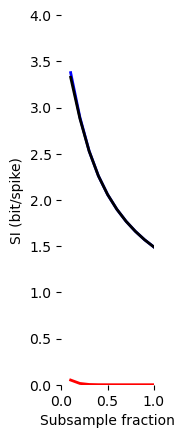

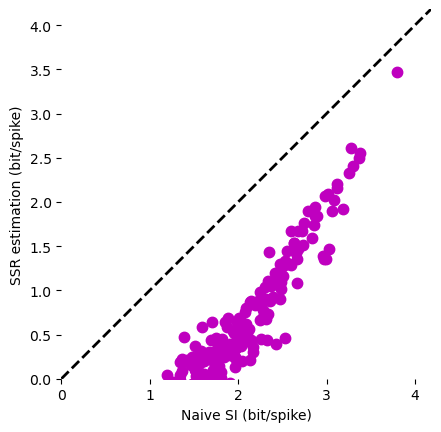

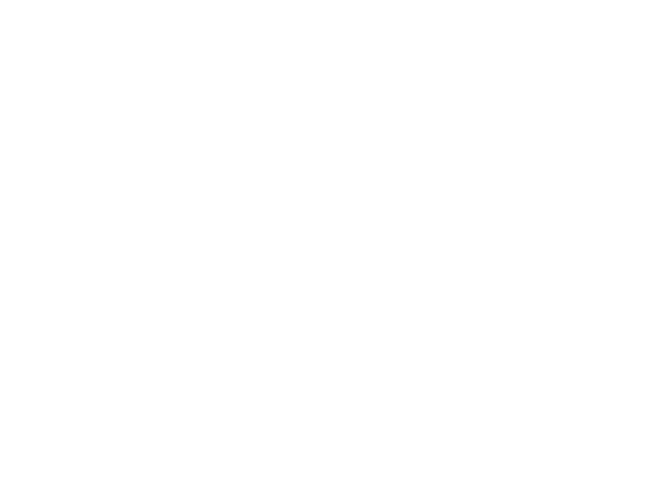

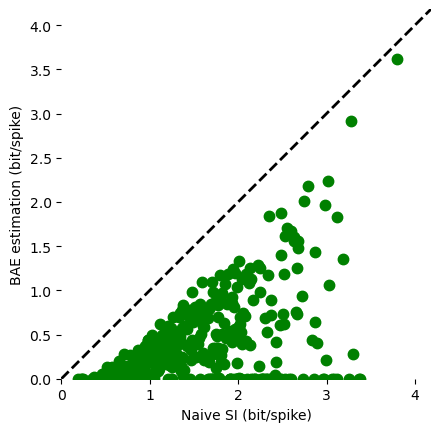

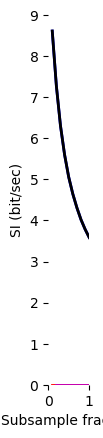

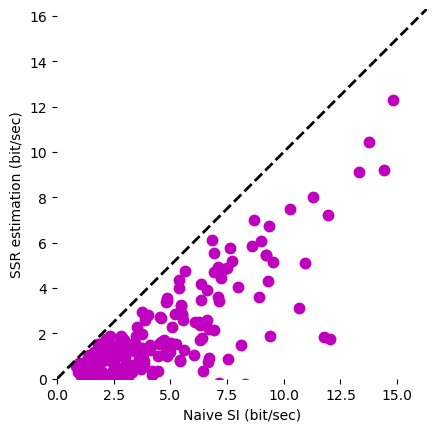

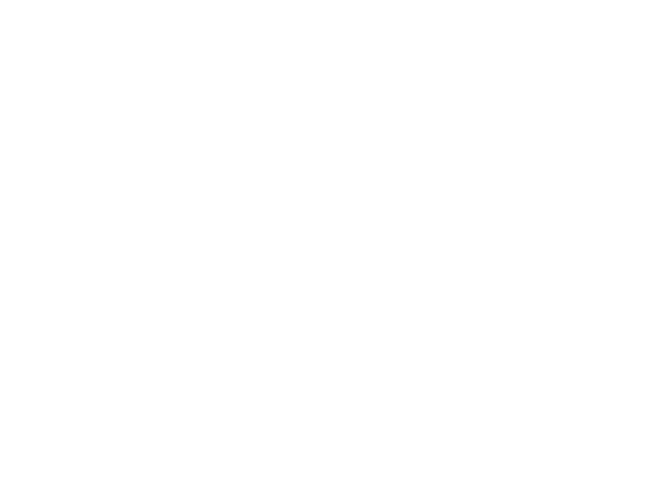

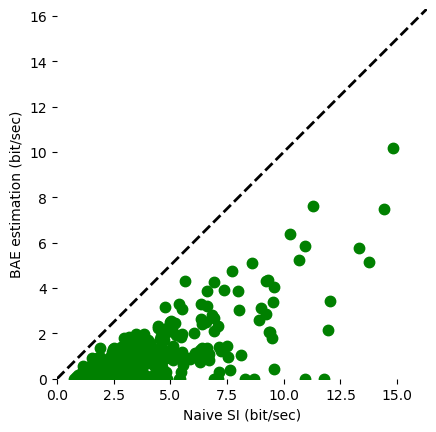

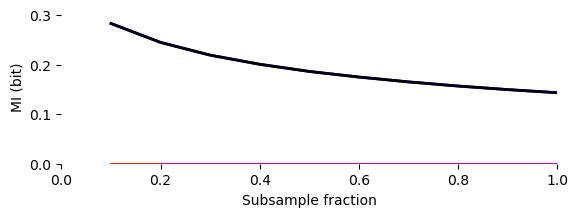

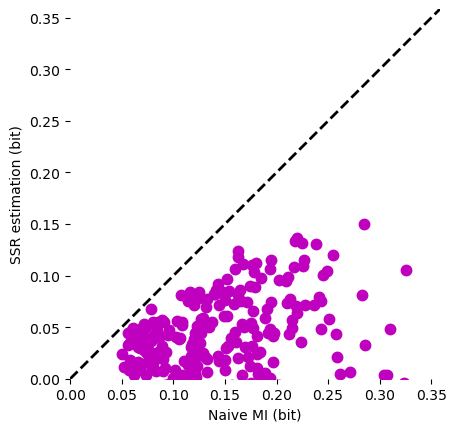

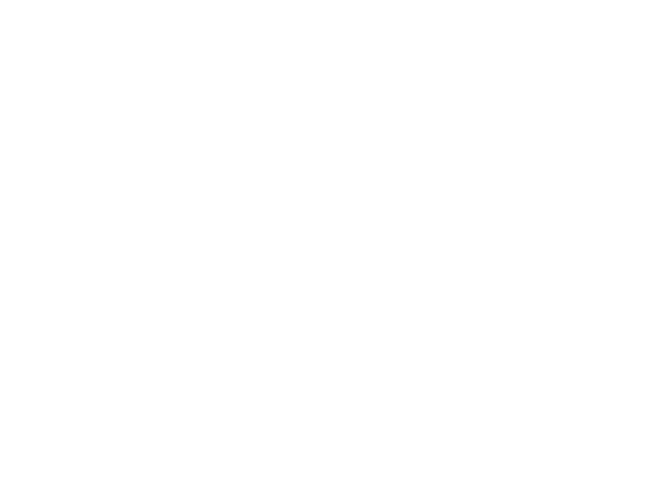

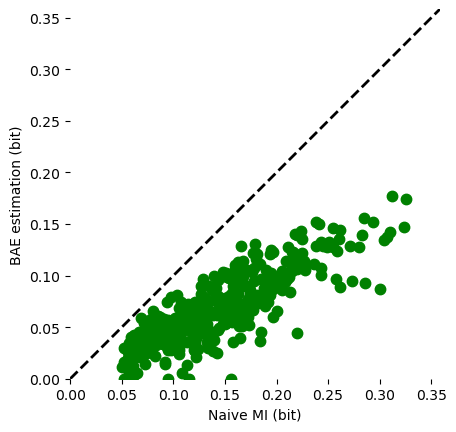

Finished analyzing data set


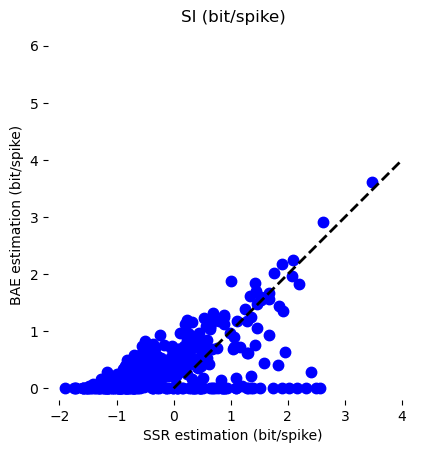

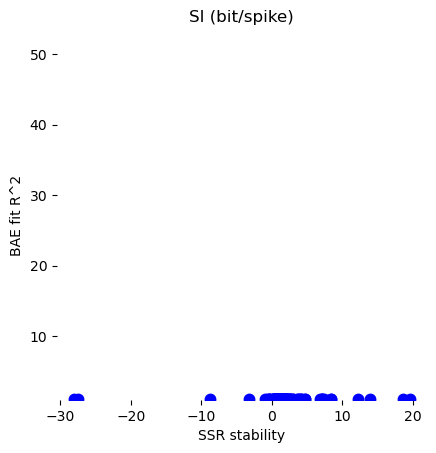

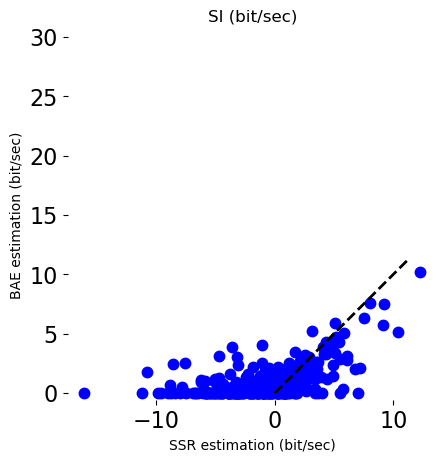

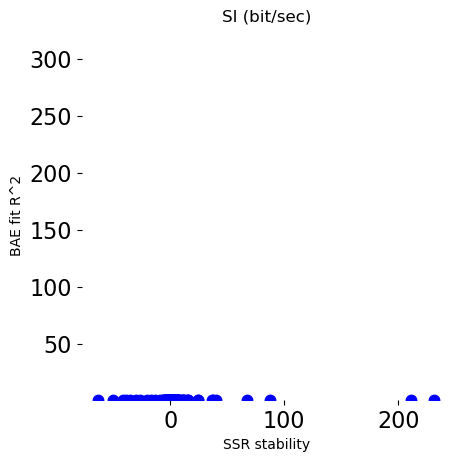

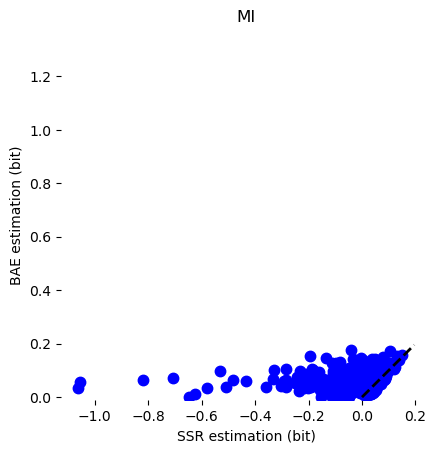

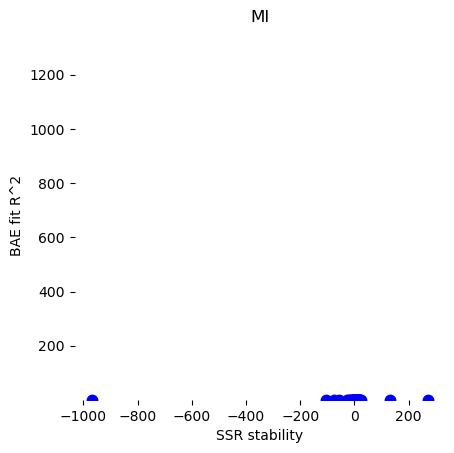

In [ ]:
results_unbias = estimate_unbiased_information(
    neuron_activity[:, behavior["active"]],
    behavior["binpos"],
)